In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras import losses, metrics, optimizers
from sklearn.metrics import classification_report
from keras.applications.vgg16 import VGG16


In [6]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [7]:
# Завантажимо датасет

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
# Трансформуємо зображення в датасеті для виконання мінімальних вимог VGG16 - (32, 32, 3)

x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

x_train = tf.image.resize(tf.convert_to_tensor(x_train), (32, 32))
x_train = tf.image.grayscale_to_rgb(x_train)

x_test = tf.image.resize(tf.convert_to_tensor(x_test), (32, 32))
x_test = tf.image.grayscale_to_rgb(x_test)

x_train = x_train / 255
x_test = x_test / 255

x_train.shape, x_test.shape

(TensorShape([60000, 32, 32, 3]), TensorShape([10000, 32, 32, 3]))

In [9]:
# Створимо згорткову нейромережу, що використовує VGG16 як згортковий шар:

conv_base = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
conv_base.trainable = False

model = Sequential()
model.add(Input((32, 32, 3)))
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

conv_base.summary(show_trainable=True), model.summary(show_trainable=True)


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 32, 32, 64)    │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 32, 32, 64)    │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 16, 16, 128)   │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 16, 16, 128)   │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 8, 8, 256)     │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 8, 8, 256)     │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 8, 8, 256)     │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 4, 4, 256)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 4, 4, 512)     │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 4, 4, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 4, 4, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 2, 2, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 1, 1, 512)     │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ vgg16 (Functional)          │ (None, 1, 1, 512)     │ 14,714,688 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 256)           │    131,328 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 10)            │      2,570 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

(None, None)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 224s 119ms/step - loss: 0.6667 - sparse_categorical_accuracy: 0.7680 - val_loss: 0.4301 - val_sparse_categorical_accuracy: 0.8419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 140ms/step - loss: 0.4046 - sparse_categorical_accuracy: 0.8526 - val_loss: 0.3995 - val_sparse_categorical_accuracy: 0.8540
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 263s 140ms/step - loss: 0.3650 - sparse_categorical_accuracy: 0.8651 - val_loss: 0.4008 - val_sparse_categorical_accuracy: 0.8550
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 262s 140ms/step - loss: 0.3433 - sparse_categorical_accuracy: 0.8724 - val_loss: 0.3786 - val_sparse_categorical_accuracy: 0.8620
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 258s 138ms/step - loss: 0.3222 - sparse_categorical_accuracy: 0.8799 - val_loss: 0.3865 - val_sparse_categorical_accuracy: 0.8594
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 260s 138ms/step - loss: 0.3081 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.3606 - val_spar

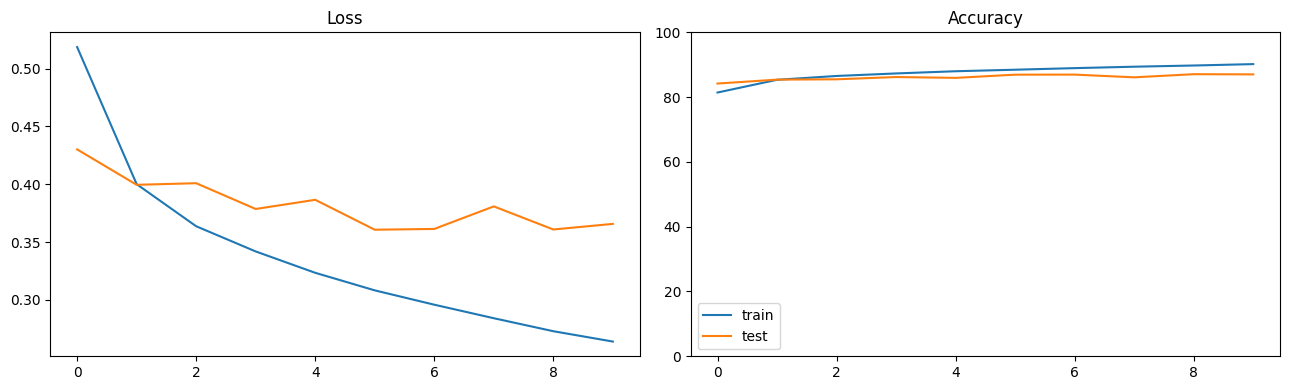

In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
plot_history(history)

In [11]:
# Розморозимо верхні шари у conv_base і донавчимо модель зменшивши learning_rate:

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == "block5_conv1":
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(
    loss=losses.SparseCategoricalCrossentropy(),
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=[metrics.SparseCategoricalAccuracy()]
)

conv_base.summary(show_trainable=True), model.summary(show_trainable=True)

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 32, 32, 3)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv1 (Conv2D)       │ (None, 32, 32, 64)    │      1,792 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_conv2 (Conv2D)       │ (None, 32, 32, 64)    │     36,928 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block1_pool (MaxPooling2D)  │ (None, 16, 16, 64)    │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv1 (Conv2D)       │ (None, 16, 16, 128)   │     73,856 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_conv2 (Conv2D)       │ (None, 16, 16, 128)   │    147,584 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block2_pool (MaxPooling2D)  │ (None, 8, 8, 128)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv1 (Conv2D)       │ (None, 8, 8, 256)     │    295,168 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv2 (Conv2D)       │ (None, 8, 8, 256)     │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_conv3 (Conv2D)       │ (None, 8, 8, 256)     │    590,080 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block3_pool (MaxPooling2D)  │ (None, 4, 4, 256)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv1 (Conv2D)       │ (None, 4, 4, 512)     │  1,180,160 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv2 (Conv2D)       │ (None, 4, 4, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_conv3 (Conv2D)       │ (None, 4, 4, 512)     │  2,359,808 │   N   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block4_pool (MaxPooling2D)  │ (None, 2, 2, 512)     │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv1 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv2 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_conv3 (Conv2D)       │ (None, 2, 2, 512)     │  2,359,808 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ block5_pool (MaxPooling2D)  │ (None, 1, 1, 512)     │          0 │   -   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━┓
┃ Layer (type)                ┃ Output Shape          ┃    Param # ┃ Trai… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━┩
│ vgg16 (Functional)          │ (None, 1, 1, 512)     │ 14,714,688 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ flatten (Flatten)           │ (None, 512)           │          0 │   -   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense (Dense)               │ (None, 256)           │    131,328 │   Y   │
├─────────────────────────────┼───────────────────────┼────────────┼───────┤
│ dense_1 (Dense)             │ (None, 10)            │      2,570 │   Y   │
└─────────────────────────────┴───────────────────────┴────────────┴───────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 7,213,322 (27.52 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

(None, None)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 392s 208ms/step - loss: 0.4620 - sparse_categorical_accuracy: 0.8361 - val_loss: 0.3163 - val_sparse_categorical_accuracy: 0.8840
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 404s 215ms/step - loss: 0.2960 - sparse_categorical_accuracy: 0.8916 - val_loss: 0.3075 - val_sparse_categorical_accuracy: 0.8845
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 404s 215ms/step - loss: 0.2645 - sparse_categorical_accuracy: 0.9018 - val_loss: 0.2814 - val_sparse_categorical_accuracy: 0.8996
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 421s 225ms/step - loss: 0.2319 - sparse_categorical_accuracy: 0.9118 - val_loss: 0.2989 - val_sparse_categorical_accuracy: 0.8888
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 419s 223ms/step - loss: 0.2154 - sparse_categorical_accuracy: 0.9193 - val_loss: 0.3036 - val_sparse_categorical_accuracy: 0.8982
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 418s 223ms/step - loss: 0.1947 - sparse_categorical_accuracy: 0.9262 - val_loss: 0.2960 - val_spar

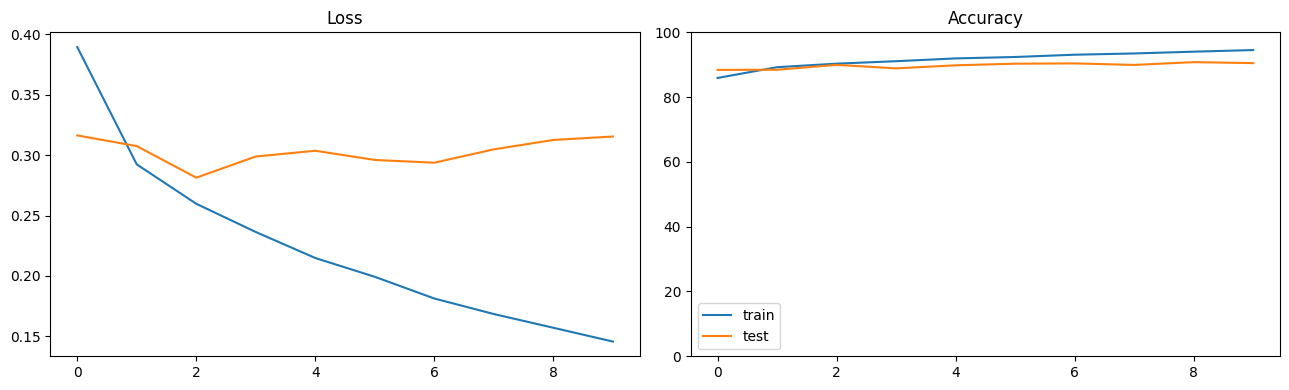

In [12]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=1)
plot_history(history)


In [13]:
# Як бачимо, точність отриманої моделі співставна з точністю згорткової мережі з першої частини завдання.

print("Classification_report for train dataset")
print(
    classification_report(
        y_train,
        tf.argmax(model.predict(x_train), axis=1)
    )
)
print("\nClassification_report for test dataset")
print(
    classification_report(
        y_test,
        tf.argmax(model.predict(x_test), axis=1)
    )
)

Classification_report for train dataset
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 215s 114ms/step
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      6000
           1       1.00      1.00      1.00      6000
           2       0.93      0.92      0.92      6000
           3       0.96      0.97      0.97      6000
           4       0.90      0.92      0.91      6000
           5       1.00      0.99      0.99      6000
           6       0.85      0.87      0.86      6000
           7       0.97      0.99      0.98      6000
           8       1.00      1.00      1.00      6000
           9       0.99      0.98      0.98      6000

    accuracy                           0.95     60000
   macro avg       0.95      0.95      0.95     60000
weighted avg       0.95      0.95      0.95     60000


Classification_report for test dataset
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step
              precision    recall  f1-score   support

           0   